In [1]:
!wget https://github.com/Denis2054/Transformers-for-NLP-2nd-Edition/blob/main/Chapter04/KantaiBERT.ipynb

--2023-07-12 18:45:37--  https://github.com/Denis2054/Transformers-for-NLP-2nd-Edition/blob/main/Chapter04/KantaiBERT.ipynb
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 565060 (552K) [text/plain]
Saving to: ‘KantaiBERT.ipynb.2’

KantaiBERT.ipynb.2  100%[===================>] 551.82K  --.-KB/s    in 0.04s   

2023-07-12 18:45:37 (13.4 MB/s) - ‘KantaiBERT.ipynb.2’ saved [565060/565060]



## Loading Dataset

In [2]:
!curl -L https://raw.githubusercontent.com/Denis2054/Transformers-for-NLP2nd-Edition/master/Chapter04/kant.txt --output "kant.txt"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    14  100    14    0     0     58      0 --:--:-- --:--:-- --:--:--    58


In [3]:
! pip install transformers

In [4]:
!pip list | grep -E 'transformers|tokenizers'

tokenizers                       0.13.3
transformers                     4.30.2


##  Step3: Training a Tokenizer

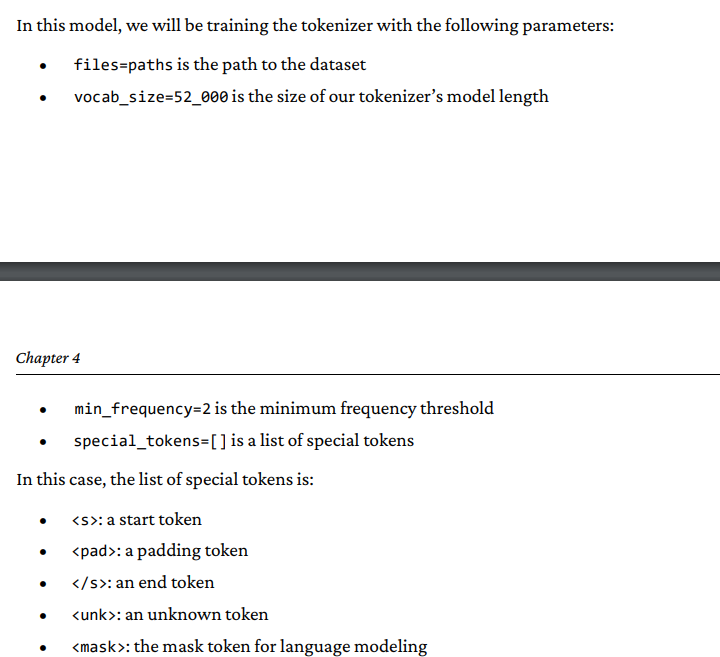

In [5]:
#@title Step 3: Training a Tokenizer
%%time
from pathlib import Path

from tokenizers import ByteLevelBPETokenizer

paths = [str(x) for x in Path(".").glob("**/*.txt")]
# Initialize a tokenizer
tokenizer = ByteLevelBPETokenizer()

# Customize training
tokenizer.train(files=paths, vocab_size=52_000, min_frequency=2, special_tokens=[
    "<s>",
    "<pad>",
    "</s>",
    "<unk>",
    "<mask>",
])

CPU times: user 12.9 ms, sys: 4.84 ms, total: 17.7 ms
Wall time: 25.4 ms


## Step 4: Saving the files to disk

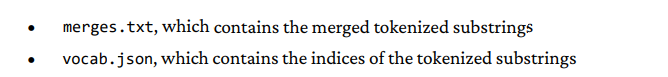


In [6]:
#@title Step 4: Saving the files to disk
import os
token_dir = '/content/KantaiBERT'
if not os.path.exists(token_dir):
  os.makedirs(token_dir)
tokenizer.save_model('KantaiBERT')

['KantaiBERT/vocab.json', 'KantaiBERT/merges.txt']

## Step 5: Loading the trained tokenizer files


In [7]:
#@title Step 5 Loading the Trained Tokenizer Files
from tokenizers.implementations import ByteLevelBPETokenizer
from tokenizers.processors import BertProcessing

tokenizer = ByteLevelBPETokenizer(
    "./KantaiBERT/vocab.json",
    "./KantaiBERT/merges.txt",
)

In [8]:
tokenizer.encode("The Critique of Pure Reason.").tokens

['T',
 'h',
 'e',
 'Ġ',
 'C',
 'r',
 'i',
 't',
 'i',
 'q',
 'u',
 'e',
 'Ġ',
 'o',
 'f',
 'Ġ',
 'P',
 'u',
 'r',
 'e',
 'Ġ',
 'R',
 'e',
 'a',
 's',
 'o',
 'n',
 '.']

In [9]:
tokenizer.encode("The Critique of Pure Reason.")


Encoding(num_tokens=28, attributes=[ids, type_ids, tokens, offsets, attention_mask, special_tokens_mask, overflowing])

In [10]:
tokenizer._tokenizer.post_processor = BertProcessing(
    ("</s>", tokenizer.token_to_id("</s>")),
    ("<s>", tokenizer.token_to_id("<s>")),
)
tokenizer.enable_truncation(max_length=512)

In [11]:
tokenizer.encode("The Critique of Pure Reason")

Encoding(num_tokens=29, attributes=[ids, type_ids, tokens, offsets, attention_mask, special_tokens_mask, overflowing])

In [12]:
tokenizer.encode("The Critique of Pure Reason.").tokens


['<s>',
 'T',
 'h',
 'e',
 'Ġ',
 'C',
 'r',
 'i',
 't',
 'i',
 'q',
 'u',
 'e',
 'Ġ',
 'o',
 'f',
 'Ġ',
 'P',
 'u',
 'r',
 'e',
 'Ġ',
 'R',
 'e',
 'a',
 's',
 'o',
 'n',
 '.',
 '</s>']

## Step 7 : Defining the configuration of the model

In [13]:
#@title Step 7: Defining the configuration of the Model
from transformers import RobertaConfig

config = RobertaConfig(
    vocab_size=52_000,
    max_position_embeddings=514,
    num_attention_heads=12,
    num_hidden_layers=6,
    type_vocab_size=1,
)

In [14]:
print(config)

RobertaConfig {
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 514,
  "model_type": "roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 6,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "transformers_version": "4.30.2",
  "type_vocab_size": 1,
  "use_cache": true,
  "vocab_size": 52000
}



## Step 8: Reloading the tokenizer in transformers


In [15]:
#@title Step 8: Re-creating the Tokenizer in Transformers
from transformers import RobertaTokenizer
tokenizer = RobertaTokenizer.from_pretrained("./KantaiBERT", max_length=512)

## Step 9: Initializing a model from scratch


In [16]:
from transformers import RobertaForMaskedLM

model = RobertaForMaskedLM(config=config)
print(model)

RobertaForMaskedLM(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(52000, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-5): 6 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): La

In [17]:
print(model.num_parameters())

83504416


In [18]:
LP=list(model.parameters())
lp=len(LP)
lp

106

In [19]:
#@title Exploring the Parameters
LP=list(model.parameters())
lp=len(LP)
print(lp)
for p in range(0,lp):
  print(LP[p])

106
Parameter containing:
tensor([[ 0.0022, -0.0142, -0.0087,  ...,  0.0119, -0.0060,  0.0093],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0063,  0.0141,  0.0054,  ..., -0.0140,  0.0086,  0.0080],
        ...,
        [ 0.0106,  0.0114,  0.0418,  ..., -0.0125,  0.0257,  0.0137],
        [-0.0235,  0.0160, -0.0127,  ...,  0.0130, -0.0101, -0.0028],
        [ 0.0198, -0.0122, -0.0216,  ...,  0.0129,  0.0094, -0.0217]],
       requires_grad=True)
Parameter containing:
tensor([[-1.4671e-02,  9.5889e-03, -1.6714e-03,  ..., -9.2925e-03,
         -1.8443e-02, -1.4549e-02],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 5.7297e-03, -2.5233e-02, -4.1955e-02,  ...,  1.0371e-02,
          2.5636e-04, -2.4900e-03],
        ...,
        [-3.2628e-03, -8.1759e-03, -3.4360e-02,  ...,  6.2496e-03,
          8.6305e-03,  1.3531e-02],
        [-4.2707e-02,  1.3406e-04,  1.2514e-03,  ..., -5.0647e-02,

## Step 10: Building the dataset

In [20]:
%%time
from transformers import LineByLineTextDataset

dataset = LineByLineTextDataset(
    tokenizer=tokenizer,
    file_path="./kant.txt",
    block_size=128,
)

CPU times: user 293 ms, sys: 31.9 ms, total: 324 ms
Wall time: 332 ms


/usr/local/lib/python3.10/dist-packages/transformers/data/datasets/language_modeling.py:119: FutureWarning: This dataset will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/language-modeling/run_mlm.py
  warnings.warn(


In [21]:
#@title Counting the parameters
np=0
for p in range(0,lp):#number of tensors
  PL2=True
  try:
    L2=len(LP[p][0]) #check if 2D
  except:
    L2=1             #not 2D but 1D
    PL2=False
  L1=len(LP[p])
  L3=L1*L2
  np+=L3             # number of parameters per tensor
  if PL2==True:
    print(p,L1,L2,L3)  # displaying the sizes of the parameters
  if PL2==False:
    print(p,L1,L3)  # displaying the sizes of the parameters

print(np)              # total number of parameters

0 52000 768 39936000
1 514 768 394752
2 1 768 768
3 768 768
4 768 768
5 768 768 589824
6 768 768
7 768 768 589824
8 768 768
9 768 768 589824
10 768 768
11 768 768 589824
12 768 768
13 768 768
14 768 768
15 3072 768 2359296
16 3072 3072
17 768 3072 2359296
18 768 768
19 768 768
20 768 768
21 768 768 589824
22 768 768
23 768 768 589824
24 768 768
25 768 768 589824
26 768 768
27 768 768 589824
28 768 768
29 768 768
30 768 768
31 3072 768 2359296
32 3072 3072
33 768 3072 2359296
34 768 768
35 768 768
36 768 768
37 768 768 589824
38 768 768
39 768 768 589824
40 768 768
41 768 768 589824
42 768 768
43 768 768 589824
44 768 768
45 768 768
46 768 768
47 3072 768 2359296
48 3072 3072
49 768 3072 2359296
50 768 768
51 768 768
52 768 768
53 768 768 589824
54 768 768
55 768 768 589824
56 768 768
57 768 768 589824
58 768 768
59 768 768 589824
60 768 768
61 768 768
62 768 768
63 3072 768 2359296
64 3072 3072
65 768 3072 2359296
66 768 768
67 768 768
68 768 768
69 768 768 589824
70 768 768
71 768 768

## Step 11: Defining a data collator
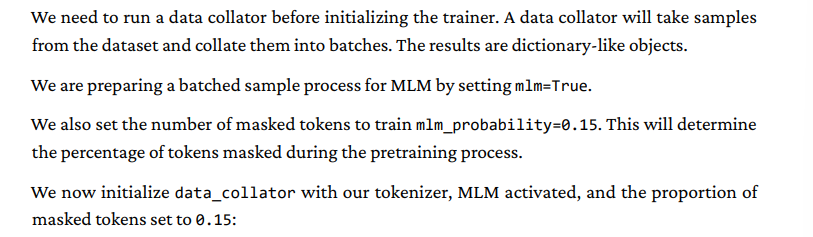


In [22]:
pip install accelerate

In [23]:
import sys
print(sys.version)

import torch
print(torch.__version__)

import accelerate
print(accelerate.__version__)

3.10.12 (main, Jun  7 2023, 12:45:35) [GCC 9.4.0]
2.0.1+cu118
0.20.3


In [24]:
from transformers.data.data_collator import DataCollatorForLanguageModeling
from transformers import DataCollatorForLanguageModeling

data_collator=DataCollatorForLanguageModeling(
    tokenizer=tokenizer,mlm=True,mlm_probability=0.15
)

## Step 12: Initializing the trainer


In [25]:
! pip install -U accelerate
! pip install -U transformers

In [27]:
#!pip uninstall -y accelerate
#!pip install accelerate  Run this if error occurs


In [38]:
#@title Step 12: Initializing the Trainer
from transformers import Trainer, TrainingArguments

training_args = TrainingArguments(
    output_dir="./KantaiBERT",
    overwrite_output_dir=True,
    num_train_epochs=150,
    per_device_train_batch_size=64,
    save_steps=10_000,
    save_total_limit=2,
)

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=dataset,
)

## 13: Pretraining the model

In [39]:
%%time
trainer.train()

Step,Training Loss


CPU times: user 7.81 s, sys: 97 ms, total: 7.91 s
Wall time: 8.57 s


TrainOutput(global_step=150, training_loss=0.6704056803385416, metrics={'train_runtime': 8.1555, 'train_samples_per_second': 18.392, 'train_steps_per_second': 18.392, 'total_flos': 621689702400.0, 'train_loss': 0.6704056803385416, 'epoch': 150.0})

In [40]:
#@title Step 14: Saving the Final Model(+tokenizer + config) to disk
trainer.save_model("./KantaiBERT")

In [41]:
#@title Step 15: Language Modeling with the FillMaskPipeline
from transformers import pipeline

fill_mask = pipeline(
    "fill-mask",
    model="./KantaiBERT",
    tokenizer="./KantaiBERT"
)

In [42]:
fill_mask("Human thinking involves human <mask>.")

[{'score': 0.02109619230031967,
  'token': 225,
  'token_str': ' ',
  'sequence': 'Human thinking involves human.'},
 {'score': 0.008791366592049599,
  'token': 83,
  'token_str': 'o',
  'sequence': 'Human thinking involves humano.'},
 {'score': 0.008024354465305805,
  'token': 72,
  'token_str': 'd',
  'sequence': 'Human thinking involves humand.'},
 {'score': 0.007258804980665445,
  'token': 24,
  'token_str': '4',
  'sequence': 'Human thinking involves human4.'},
 {'score': 0.002753227250650525,
  'token': 88,
  'token_str': 't',
  'sequence': 'Human thinking involves humant.'}]